# Part II - Riding the Trends: Unveiling User Patterns in the Ford GoBike System
## by Nhan V. Nguyen

## Investigation Overview


**"Understand the dynamics of Ford GoBike System usage – focusing on user types, trip durations, and time patterns."**


## Dataset Overview and Executive Summary

The Ford GoBike System dataset contains data on bike trips taken by users. It captures essential details like trip duration, start and end points of the trip, as well as user-specific details like their birth year and whether they share their bike for the trip.

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Visualization 1: Hourly and Weekly Distribution

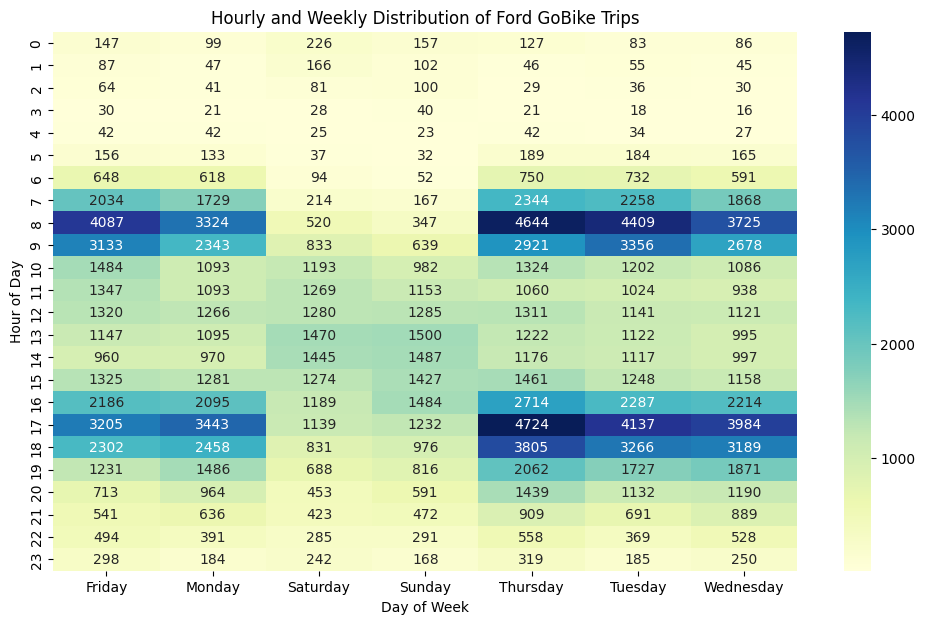

In [9]:
# Assuming 'start_time' column is in datetime format
df['start_time'] = pd.to_datetime(df['start_time'])
df['hour'] = df['start_time'].dt.hour
df['day_of_week'] = df['start_time'].dt.day_name()

heatmap_data = df.pivot_table(index='hour', columns='day_of_week', values='bike_id', aggfunc='count')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title("Hourly and Weekly Distribution of Ford GoBike Trips")
plt.xlabel("Day of Week")
plt.ylabel("Hour of Day")
plt.show()

### Visualization 2: Trip Duration Distribution by User Type


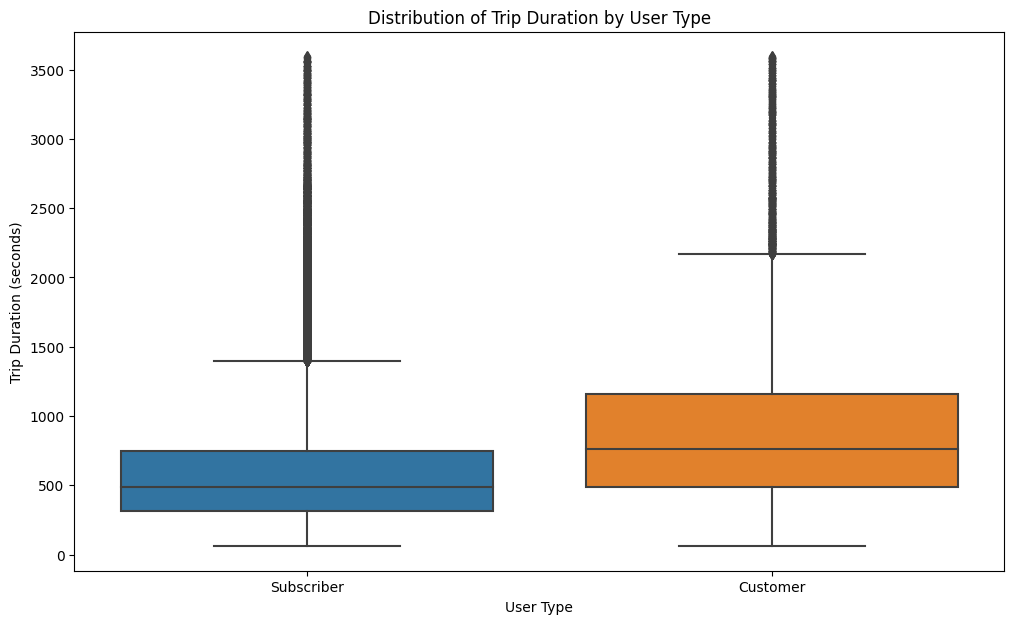

In [10]:
# Filter out extreme trip durations for better visualization
df_filtered = df[df['duration_sec'] < 3600]

plt.figure(figsize=(12, 7))
sns.boxplot(x="user_type", y="duration_sec", data=df_filtered)
plt.title("Distribution of Trip Duration by User Type")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (seconds)")
plt.show()

### Visualization 3: Ford GoBike Usage Trends by User Type in February

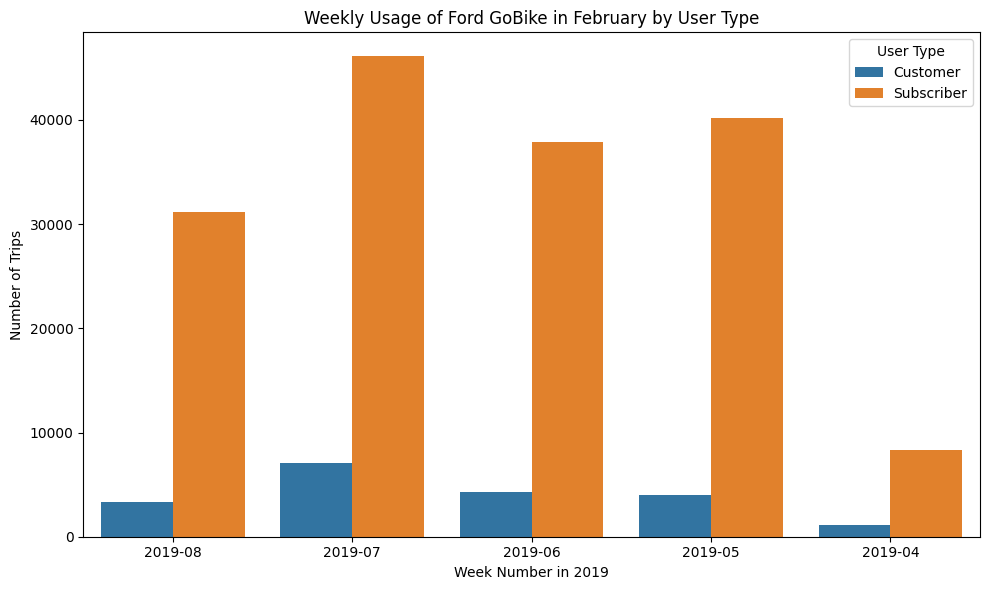

In [11]:
# Convert 'start_time' column to datetime format
df['start_time'] = pd.to_datetime(df['start_time'])

# Once converted, you can proceed with your existing code:

# Adding the 'Week_Number' column to the dataframe
df['Week_Number'] = df['start_time'].dt.strftime('%Y-%U')

# Filtering data for February
february_data = df[df['start_time'].dt.month == 2]

plt.figure(figsize=(10, 6))
sns.countplot(data=february_data, x='Week_Number', hue='user_type')
plt.title('Weekly Usage of Ford GoBike in February by User Type')
plt.xlabel('Week Number in 2019')
plt.ylabel('Number of Trips')
plt.legend(title='User Type')
plt.tight_layout()
plt.show()


# Conclusion
**Hourly and Weekly Distribution**:
- The heatmap clearly displays peak usage during typical commuting hours (7-9 am and 4-6 pm), indicating that many people use the service for work-related transportation.
- Weekdays see a significantly higher usage than weekends, with Tuesday, Wednesday, and Thursday being the most popular days. This suggests that the bikes are used primarily for work or errands during the week.

**Trip Duration Distribution by User Type**:
- Most subscribers tend to have shorter trips, probably indicative of daily commuters or individuals using the bikes for short errands.
- Customers, on the other hand, have a wider range of trip durations, suggesting more varied purposes – perhaps including leisure or exploration trips.

**Ford GoBike Usage Trends by User Type in February**:
- The bar chart for usage in February shows an interesting spike in rides for subscribers during this month. This could be due to a number of reasons such as promotional events, favorable weather conditions, or other external factors that encouraged more subscribers to use the service.
- Customers seem to have a consistent usage pattern throughout the month.

**Investigation Overview**:
- The main goal was to understand the dynamics of Ford GoBike System usage, focusing on user types, trip durations, and time patterns. The visualizations provided comprehensive insights into these aspects, showcasing the preferences and behaviors of the users.
- In conclusion, the Ford GoBike System is heavily utilized by daily commuters, especially during peak work hours on weekdays. The service sees varied usage patterns based on the type of user (subscriber or customer), with subscribers primarily using the service for shorter, regular trips and customers having more varied durations. This information can be invaluable for planning and optimization, allowing for better allocation of resources and targeted marketing strategies.